In [290]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [291]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import features
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

Read data

In [292]:
ames = pd.read_csv("../data/engineered.csv")
ames.drop("Unnamed: 0", axis=1, inplace=True)

Select target and features for X to regress on

In [293]:
X_best_so_far = ames[[
    # Size
    'GrLivArea', 'AllBathrooms', 'BedroomAbvGr',
    # Type
    'MSSubClass', 'MSZoning',
    # Niceness
    'OverallQual', 'OverallCond', 'Neighborhood', 'KitchenQual',
    # Sale
    'SaleCondition', 'YrSold',
    # Features
    'CentralAir', 'Fireplaces',
    # Others
    'IsNearNegativeCondition', 'LandContour'
]]

In [294]:
# use james' feature engineering
# TODO add to engineered.csv
ames['TotalOutdoorSF'] = ames.ScreenPorch + ames.WoodDeckSF + ames.OpenPorchSF + ames.EnclosedPorch
ames['Age'] = 2010 - ames.YearBuilt
ames['AgeRemod'] = 2010 - ames.YearRemodAdd
ames['AgeGarage'] = 2010 - ames.GarageYrBlt
ames['HasPool'] = (ames.PoolArea > 1).astype(int)
ames['TotalFinBsmtSF'] = ames.BsmtFinSF1 + ames.BsmtFinSF2
ames['TotalOutdoorSF'] = ames.ScreenPorch + ames.WoodDeckSF + ames.OpenPorchSF + ames.EnclosedPorch
ames['logLotArea'] = np.log(ames.LotArea)

# test features from James' tree model
box_keep_all = ['LandSlope','BsmtExposure','BsmtFullBath','BsmtHalfBath','Fireplaces','BsmtFinType1','HeatingQC','FullBath','HalfBath',
                'Functional','TotRmsAbvGrd','GarageCars','PavedDrive','HasPool']

box_keep_1 = ['OverallQual','OverallCond']

box_keep_2 = ['ExterQual','ExterCond','BsmtQual','BsmtCond','KitchenQual','FireplaceQu','GarageQual','GarageCond']

scatter_keep_all = ['LotFrontage','GarageArea','MasVnrArea']

scatter_keep_1 = ['TotalOutdoorSF','TotalBsmtSF','GrLivArea']

scatter_keep_2 = ['BsmtFinSF1','1stFlrSF','2ndFlrSF','ScreenPorch','WoodDeckSF','OpenPorchSF','EnclosedPorch']


features_james = box_keep_all + box_keep_2 + scatter_keep_all + scatter_keep_2

features_broad = box_keep_all + box_keep_1 + scatter_keep_all + scatter_keep_1



In [295]:
model = LinearRegression()

target = ames.LogSalePrice
X = ames[[
    # Size, Bedrooms, Bathrooms
    'GrLivArea', 'TotalFinBsmtSF', 'LotArea', 'TotalOutdoorSF',
    'AllBathrooms', 'BedroomAbvGr',
    # Type
    'MSSubClass', 'MSZoning',
    # Niceness
    'OverallQual', 'OverallCond', 'Neighborhood', 'KitchenQual',
    # Sale
    'SaleCondition', 'YrSold',
    # Features
    'CentralAir', 'Fireplaces', 'HasPool',
    # Others
    'IsNearNegativeCondition', 'LandContour'
]]
X

,GrLivArea,TotalFinBsmtSF,LotArea,TotalOutdoorSF,AllBathrooms,BedroomAbvGr,MSSubClass,MSZoning,OverallQual,OverallCond,Neighborhood,KitchenQual,SaleCondition,YrSold,CentralAir,Fireplaces,HasPool,IsNearNegativeCondition,LandContour
0,856,238.0,7890,166,2.0,2,Dwelling_30,RL,6,6,SWISU,3,Normal,Yr_2010,Y,1,0,0,Lvl
1,1049,945.0,4235,105,3.0,2,Dwelling_120,RL,5,5,Edwards,4,Normal,Yr_2009,Y,0,0,0,Lvl
2,1001,737.0,6060,196,1.0,2,Dwelling_30,C (all),5,9,IDOTRR,4,Normal,Yr_2007,Y,0,0,0,Lvl
3,1039,0.0,8146,279,1.0,2,Dwelling_70,RL,4,8,OldTown,3,Normal,Yr_2009,Y,0,0,0,Lvl
4,1665,643.0,8400,45,3.5,3,Dwelling_60,RL,8,6,NWAmes,4,Normal,Yr_2009,Y,0,0,0,Lvl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2572,952,0.0,8854,138,1.0,2,Dwelling_30,RL,6,6,BrkSide,2,Normal,Yr_2009,N,1,0,0,Lvl
2573,1733,0.0,13680,0,2.0,4,Dwelling_20,RL,3,5,Edwards,3,Normal,Yr_2009,Y,1,0,0,Lvl
2574,2002,284.0,6270,0,2.0,4,Dwelling_90,RH,5,6,Crawfor,3,Normal,Yr_2007,N,0,0,0,HLS
2575,1842,841.0,8826,289,3.5,3,Dwelling_60,RL,7,5,CollgCr,4,Normal,Yr_2007,Y,1,0,0,Lvl


Encode categorical features

In [296]:
# All possible features
all_categorical_features = set(features.get_categorical_features())
all_numerical_features = set(features.get_numerical_features())

# What are the categorical + numerical features in X
X_categorical_features = list(all_categorical_features.intersection(set(X.columns)))
X_numerical_features = list(all_numerical_features.intersection(set(X.columns)))
X_features = X_categorical_features + X_numerical_features

# Dummify categorical features from all features selected for our model
X = pd.get_dummies(X, columns=X_categorical_features, prefix=X_categorical_features, drop_first=True)
X

,GrLivArea,TotalFinBsmtSF,LotArea,TotalOutdoorSF,AllBathrooms,BedroomAbvGr,OverallQual,OverallCond,KitchenQual,Fireplaces,...,MSSubClass_Dwelling_85,MSSubClass_Dwelling_90,LandContour_HLS,LandContour_Low,LandContour_Lvl,YrSold_Yr_2007,YrSold_Yr_2008,YrSold_Yr_2009,YrSold_Yr_2010,CentralAir_Y
0,856,238.0,7890,166,2.0,2,6,6,3,1,...,0,0,0,0,1,0,0,0,1,1
1,1049,945.0,4235,105,3.0,2,5,5,4,0,...,0,0,0,0,1,0,0,1,0,1
2,1001,737.0,6060,196,1.0,2,5,9,4,0,...,0,0,0,0,1,1,0,0,0,1
3,1039,0.0,8146,279,1.0,2,4,8,3,0,...,0,0,0,0,1,0,0,1,0,1
4,1665,643.0,8400,45,3.5,3,8,6,4,0,...,0,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2572,952,0.0,8854,138,1.0,2,6,6,2,1,...,0,0,0,0,1,0,0,1,0,0
2573,1733,0.0,13680,0,2.0,4,3,5,3,1,...,0,0,0,0,1,0,0,1,0,1
2574,2002,284.0,6270,0,2.0,4,5,6,3,0,...,0,1,1,0,0,1,0,0,0,0
2575,1842,841.0,8826,289,3.5,3,7,5,4,1,...,0,0,0,0,1,1,0,0,0,1


Check for multicolinearity

In [297]:
# NOTE: The VIFs in the R car package also give VIF by the degrees of freedom of the feature which is useful for
# dummified features with lots of categories. So cross-check with linreg.R
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X_add_const = add_constant(X) # apparently, this is required for statsmodels
vif = pd.DataFrame()
vif['features'] = X_add_const.columns
vif['VIF'] = [variance_inflation_factor(X_add_const.values, i) for i in range(X_add_const.shape[1])]
vif

,features,VIF
0,const,2926.610436
1,GrLivArea,4.554141
2,TotalFinBsmtSF,2.015172
3,LotArea,1.477531
4,TotalOutdoorSF,1.360440
...,...,...
69,YrSold_Yr_2007,1.724683
70,YrSold_Yr_2008,1.702732
71,YrSold_Yr_2009,1.743014
72,YrSold_Yr_2010,1.458629


In [298]:
# Create training set and holdout
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.3, random_state=42)

In [299]:
# Fit model
model.fit(X=X_train, y=y_train)
y_predict = model.predict(X_test)

In [300]:
# Fit same model using statsmodels to see statistics
X_add_const = sm.add_constant(X_train)
ols = sm.OLS(y_train, X_add_const)
ans = ols.fit()
print(ans.summary())

                            OLS Regression Results                            
Dep. Variable:           LogSalePrice   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     271.0
Date:                Sun, 06 Mar 2022   Prob (F-statistic):               0.00
Time:                        17:26:26   Log-Likelihood:                 1440.0
No. Observations:                1803   AIC:                            -2732.
Df Residuals:                    1729   BIC:                            -2325.
Df Model:                          73                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [301]:
# See more statsmodels statistics
def results_summary_to_dataframe(results):
    '''Take the result of an statsmodel results table and transforms it into a dataframe'''
    pvals = results.pvalues
    coeff = results.params
    conf_lower = results.conf_int()[0]
    conf_higher = results.conf_int()[1]

    results_df = pd.DataFrame({"pvals":pvals,
                               "coeff":coeff,
                               "conf_lower":conf_lower,
                               "conf_higher":conf_higher
                               })

    # Reorder
    results_df = results_df[["coeff","pvals","conf_lower","conf_higher"]]
    return results_df

print(f"AIC {ans.aic}")
print(f"BIC {ans.bic}")
results_summary_to_dataframe(ans)

AIC -2731.9619171419345
BIC -2325.168582624889


,coeff,pvals,conf_lower,conf_higher
const,10.233456,0.000000e+00,9.996796,10.470117
GrLivArea,0.000306,3.209727e-128,0.000283,0.000329
TotalFinBsmtSF,0.000103,3.821278e-34,0.000087,0.000119
LotArea,0.000002,1.296334e-06,0.000001,0.000003
TotalOutdoorSF,0.000056,3.345393e-03,0.000019,0.000093
...,...,...,...,...
YrSold_Yr_2007,-0.012787,1.209537e-01,-0.028951,0.003377
YrSold_Yr_2008,-0.015350,6.899498e-02,-0.031896,0.001196
YrSold_Yr_2009,-0.027449,1.138722e-03,-0.043968,-0.010931
YrSold_Yr_2010,-0.007384,4.427931e-01,-0.026250,0.011482


In [302]:
# Score model
print(f"Coefficient of Determination training set: {round(model.score(X=X_train, y=y_train), 5)}")
print(f"Coefficient of Determination holdout set:  {round(model.score(X=X_test, y=y_test), 5)}")
print(f"MSE:                                       {round(mean_squared_error(y_true=y_test, y_pred=y_predict), 5)}")

Coefficient of Determination training set: 0.91963
Coefficient of Determination holdout set:  0.90246
MSE:                                       0.01495


In [303]:
# Beta coefficients
beta_names = np.insert(model.feature_names_in_, 0, "__Intercept__")
log_coefficients = np.insert(model.coef_, 0, model.intercept_)
unlogged_coefficients = np.insert(np.exp(model.coef_), 0, np.exp(model.intercept_))
coeff_array = np.vstack([beta_names, log_coefficients, unlogged_coefficients]).T
pd.DataFrame(coeff_array, columns=['Features', 'Coefficients (log)', 'Coefficients'])

,Features,Coefficients (log),Coefficients
0,__Intercept__,10.233456,27818.495913
1,GrLivArea,0.000306,1.000306
2,TotalFinBsmtSF,0.000103,1.000103
3,LotArea,0.000002,1.000002
4,TotalOutdoorSF,0.000056,1.000056
...,...,...,...
69,YrSold_Yr_2007,-0.012787,0.987294
70,YrSold_Yr_2008,-0.01535,0.984767
71,YrSold_Yr_2009,-0.027449,0.972924
72,YrSold_Yr_2010,-0.007384,0.992643


In [304]:
# Residuals
model_residuals_test = y_test - y_predict
model_residuals_test.describe()

count    774.000000
mean       0.007042
std        0.122146
min       -1.436565
25%       -0.054783
50%        0.002972
75%        0.068545
max        0.565300
Name: LogSalePrice, dtype: float64

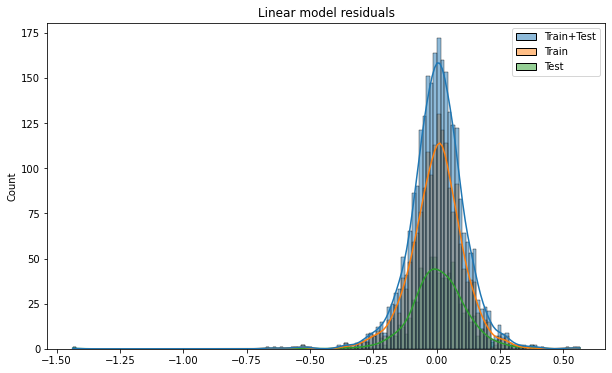

In [305]:
# Plot residuals
residuals_all = ames.LogSalePrice - model.predict(X)
residuals_train = y_train - model.predict(X_train)
residuals_test = y_test - model.predict(X_test)
residuals = pd.DataFrame({"Train+Test": residuals_all, "Train": residuals_train, "Test": residuals_test})

fig, ax = plt.subplots(figsize=(10,6))
sns.histplot(residuals, kde=True, ax=ax)
plt.title("Linear model residuals")
plt.show()

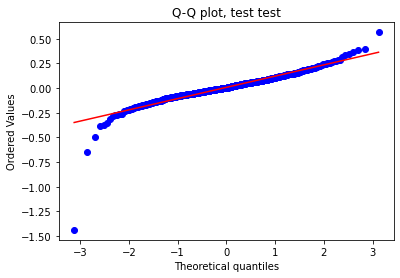

In [306]:
# Quantile-Quantile plot
from scipy import stats
stats.probplot(residuals_test, dist="norm", plot=plt)
plt.title("Q-Q plot, test test")
plt.show()

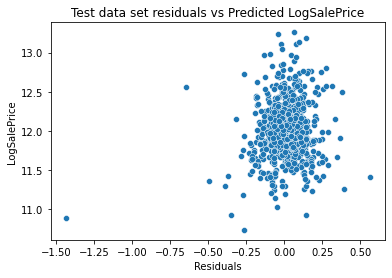

In [307]:
# Residuals vs Predicted LogSalePrice
sns.scatterplot(x=residuals_test, y=y_predict)
plt.title("Test data set residuals vs Predicted LogSalePrice")
plt.xlabel("Residuals")
plt.ylabel("LogSalePrice")
plt.show()